# ejercicio 2

En este ejercicio trabajaremos con el método de descenso de gradiente, el cual constituye otra herramienta crucial, en esta ocasi´on de la rama del cálculo, para el proceso de retropropagación asociado al entrenamiento de una red neuronal.

## [1 punto] Prográmese en Python el método de descenso de gradiente para funciones de n variables.

La función deberá tener como parámetros de entradas:
- El gradiente de la función que se desea minimizar ∇f (puede venir dada como otra función previamente implementada, grad f, con entrada un vector, representando
- el punto donde se quiere calcular el gradiente, y salida otro vector, representando el gradiente de f en dicho punto).
- Un valor inicial x0 ∈ Rn (almacenado en un vector de n componentes).
- El ratio de aprendizaje γ (que se asume constante para cada iteración).
- Un parámetro de tolerancia tol (con el que finalizar el proceso cuando ∥∇f(x)∥2 < tol).
- Un número máximo de iteraciones maxit (con el fin de evitar ejecuciones indefinidas en caso de divergencia o convergencia muy lenta).

La salida de la función deberá ser la aproximación del x que cumple f′(x) ≈ 0, correspondiente a la última iteración realizada en el método.

In [6]:
import numpy as np
from sympy import diff, symbols
import matplotlib.pyplot as plt

In [7]:
# Esta funcion calcula el gradiente para cualquier funcion, dada una funcion lambda y la lista de sus correspondientes variables
def gradiente(funcion_lambda, lista_variables:list):

    import numpy as np
    from sympy import diff, symbols, lambdify 

    gradiente = {}                                                      # el gradiente será un diccionario donde las claves seran la funcion escrita y los valores, la funcion gradiente de cada componente
    simb_var = symbols(lista_variables)                                 # guardo los simbolos de las variables que utilizaré después

    for variable in lista_variables:                                    # para cada variable en mi lista de variables vamos a calcular su derivada parcial

        derivada_parcial = diff(funcion_lambda(*simb_var), variable)    # se crea la funcion gradiente 'escrita', es necesario desempaquetar todas las variables para darselas a la funcion lambda
        f_dev_parcial = lambdify(simb_var, derivada_parcial)            # comvierto la funcion 'escrita' en otra funcion lambda, que es la derivada parcial de la variable correspondiente
        gradiente[derivada_parcial] = f_dev_parcial                     # añado a mi diccionario tanto la derivada 'escrita' (llave), como la derivada en formato lambda (valor)

    return gradiente                                                    # devuelvo el diccionario de mis derivadas parciales, que juntas, conforman el vector gradiente



# esta funcion calcula el descenso por gradiente dandole una funcion lambda su lista de variables, el punto inicial, el learning rate, la precision, y un maximo de iteraciones
def gradient_descent(funcion_lambda, lista_variables:list, punto_inicial:list, rate:float, precision:float, maxit:int):

    x = np.array(punto_inicial).astype(float)                           # comvierto el punto en un array y lo paso a float para que no me de problemas
    grad_f = gradiente(funcion_lambda, lista_variables)                 # calculo mi gradiente que tiene los componenetes 

    if len(grad_f) == 1:                                                # si mi vector gradiente es UNIVARIALBLE (solo x) ejecuta el siguiente código

        for epoca in range(maxit):                                      # para cada epoca 

            for componente in grad_f.values():                          # este mini bucle me permite asignarle un punto a mi gradiente univariable, es para acceder al valor del diccionario
                grad = np.array(componente(x))

            norm_grad = np.linalg.norm(grad)                            # calculo la norma de mi vector de un solo componente

            if norm_grad < precision:                                   # si el valor obtenido esta por debajo de la precision requerida ROMPE el bucle
                break

            x -= rate*grad                                              # se actualiza el valor del nuestro punto

    else:                                                               # si vector gradiente es MULTIVARIABLE (x,y,z, etc.) ejecuta el siguiente código
        
        for epoca in range(maxit):                                      # para cada época 
        
            grad = np.array([componente(*x) for componente in grad_f.values()])     # le asigno el punto de análisis a mi vector gradiente y me devuelve el punto objetivo en forma de array
            norm_grad = np.linalg.norm(grad)                                        # calculo la norma de mi vector gradiente multivariable

            if norm_grad < precision:                                   # si la norma esta por debajo de mi umbral ROMPE el bucle
                break

            x -= rate*grad                                              # se actualiza el punto de análisis

    return x                                                            # se devuleve el último punto de analisis



In [8]:
# Ejemplo de uso
# Supongamos que queremos minimizar la función f(x, y) = x^2 + y^2
# El gradiente de f(x, y) es ∇f(x, y) = [2x, 2y]

x0 = [1, 1]                             # Valor inicial
gamma = 0.1                             # Ratio de aprendizaje
tol = 1e-10                             # Tolerancia o precision
maxit = 1000000                         # Número máximo de iteraciones

f1 = lambda x, y: x**2 + y**2           # la funcion a la que voy a aplicar el descenso por gradiente, en este caso multivarialbe
variables =  ['x','y']                  # las variables de la funcion

result = gradient_descent(f1,variables , x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f1, variables).keys())[0]}, {list(gradiente(f1, variables).keys())[1]})')
print("Aproximación de x que cumple ∇F(x) ≈ 0:", result)

El gradiente = (2*x, 2*y)
Aproximación de x que cumple ∇F(x) ≈ 0: [3.41757926e-11 3.41757926e-11]


## b) Sea la función $f : R → R$ dada por $f(x) = 3x4 + 4x3 − 12x2 + 7$

### i [0.5 puntos] Aplica el método sobre f(x) con x0 = 3 γ = 0.001, tol=1e-12,maxit=1e5.

In [9]:
x0 = [3]
gamma = 0.001
tol = 1e-12
maxit = int(1e5)


f2 = lambda x: 3*x**4 + 4*x**3 - 12*x**2+7           # la funcion a la que voy a aplicar el descenso por gradiente, en este caso univariable
variables =  ['x']                                   # las variables de la funcion

result = gradient_descent(f2, variables,  x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f2, variables).keys())[0]})')
print("Aproximación de x que cumple ∇F:", result)

El gradiente = (12*x**3 + 12*x**2 - 24*x)
Aproximación de x que cumple ∇F: [1.]


### ii [0.5 puntos] Aplica de nuevo el m´etodo sobre f(x) con x0 = 3, γ = 0.01, tol=1e-12, maxit=1e5.

In [5]:
x0 = [3]
gamma = 0.01                                         # ahora el learning rate es 10 veces mas alto
tol = 1e-12
maxit = int(1e5)


f2 = lambda x: 3*x**4 + 4*x**3 - 12*x**2 + 7         # la funcion a la que voy a aplicar el descenso por gradiente, en este caso univariable
variables =  ['x']                                   # las variables de la funcion

result = gradient_descent(f2, variables,  x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f2, variables).keys())[0]})')
print("Aproximación de x que cumple ∇F:", result)

El gradiente = (12*x**3 + 12*x**2 - 24*x)
Aproximación de x que cumple ∇F: [-2.]


### iii [0.5 puntos] Contrasta e interpreta los dos resultados obtenidos en los apartados anteriores y compáralos con los mínimos locales obtenidos analáıticamente. ¿Qué influencia puede llegar a tener la elección del ratio de aprendizaje γ?

En el primer caso, con γ = 0.001, la aproximación obtenida fue x ≈ 1.0. Si analizamos la forma de la función, podemos ver que hay un mínimo local en x = 1.0, lo que indica que el método de descenso de gradiente ha convergido a ese mínimo local de la función.

En el segundo caso, con γ = 0.01, la aproximación obtenida fue x ≈ -2.0. En este caso, la función tiene un máximo local en x = -2.0, lo que indica que el método de descenso de gradiente ha convergido a ese máximo local de la función.

En ambos casos, los resultados obtenidos por el método de descenso de gradiente concuerdan con los mínimos locales de la función f(x) = 3x⁴ + 4x³ - 12x² + 7.

Mediante el ratio de aprendizaje se controla la velocidad de convergencia del método del descenso por gradiente, con un mayor ratio de aprendizaje convergerá mas rápidamente, pero se corre el riesgo de pasarse de largo (del mínimo absoluto) si el ratio es demasiado alto, para después quedar atrapado en un mínimo local o no llegar a ningun mínimo. Es decir, que se gana rapidez, pero a cambio de perder precisión, con el riesgo de diverger de la solución óptima o no converger en ninguna solución.

Con un menor ratio de aprendizaje tardariamos más épocas en llegar al mínimo deseado (o quizas podríamos no llegar), y corremos un mayor riesgo de quedar atrapados en un mínimo local, además de gastar más recursos computacionales. Se gana precisión y se converge a una solución relativamente fácil, a cambio de tardar más en llegar a una solución y sin tener garantías de que esa solución sea la óptima.

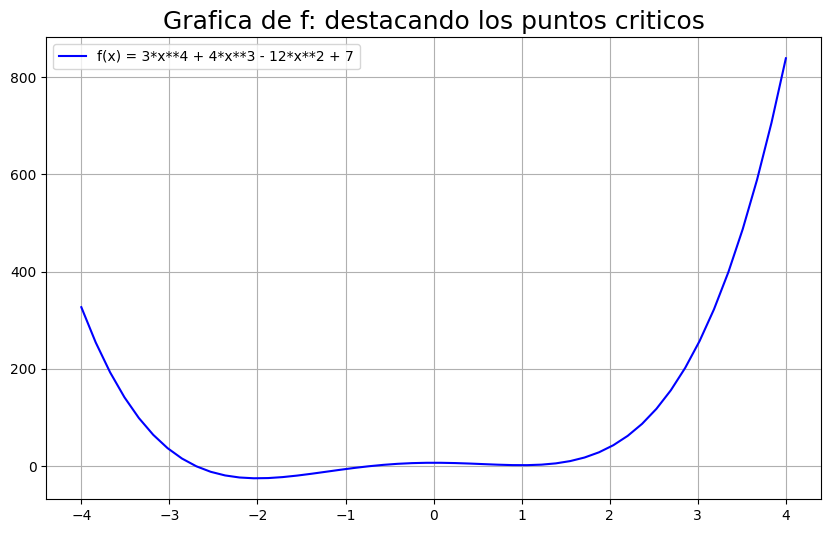

In [6]:
plt.figure(figsize = (10,6))

x = np.linspace(-4,4)
y = 3*x**4 + 4*x**3 - 12*x**2+7 

plt.plot(x, y, 
         color = 'blue',
         label= 'f(x) = 3*x**4 + 4*x**3 - 12*x**2 + 7')

plt.title('Grafica de f: destacando los puntos criticos', fontdict={'fontsize':18})
plt.grid()
plt.legend()

plt.show()

### iv [0.5 puntos] Aplica nuevamente el método sobre f(x) con x0 = 3, γ = 0.1, tol=1e-12, maxit=1e5. Interpreta el resultado.

In [7]:
x0 = [3]
gamma = 0.1                                          # ahora el learning rate es 10 veces mas alto
tol = 1e-12
maxit = int(1e5)


f2 = lambda x: 3*x**4 + 4*x**3 - 12*x**2 + 7         # la funcion a la que voy a aplicar el descenso por gradiente, en este caso univariable
variables =  ['x']                                   # las variables de la funcion

result = gradient_descent(f2, variables,  x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f2, variables).keys())[0]})')
print("Aproximación de x que cumple ∇F:", result)

<lambdifygenerated-11>:2: RuntimeWarning: overflow encountered in power
  return 12*x**3 + 12*x**2 - 24*x
<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in subtract
  return 12*x**3 + 12*x**2 - 24*x


El gradiente = (12*x**3 + 12*x**2 - 24*x)
Aproximación de x que cumple ∇F: [nan]


Lo que me ocurre en este caso es un 'desbordamiento' (overflow) en el cálculo por elevar un número a una potencia determinada. Esto ocurre para ratios de aprendizaje superiores a 0.1, por lo que entiendo que la función se 'escapa' (como se comentaba en el apartado anterior), del minimo y empieza a crecer de manera polinómica, lo que me genéra un fallo en el cálculo del valor y me devuelve NaN.

Se podría decir que no converge a ninguna solución.

### v [0.5 puntos] Finalmente, aplica el metodo sobre f(x) con x0 = 0, γ = 0.001, tol=1e-12, maxit=1e5. Interpreta el resultado y comparalo con el estudio analítico de f. ¿Se trata de un resultado deseable? ¿Por qué? ¿A qué se debe este fenómeno?

In [8]:
x0 = [0]                                                # cambiamos el punto inicial a 0
gamma = 0.001                                           # el learning rate vuelve a ser el inicial                                     
tol = 1e-12
maxit = int(1e5)


f2 = lambda x: 3*x**4 + 4*x**3 - 12*x**2 + 7            # la funcion a la que voy a aplicar el descenso por gradiente, en este caso univariable
variables =  ['x']                                      # las variables de la funcion

result = gradient_descent(f2, variables,  x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f2, variables).keys())[0]})')
print("Aproximación de x que cumple ∇F:", result)

El gradiente = (12*x**3 + 12*x**2 - 24*x)
Aproximación de x que cumple ∇F: [0.]


Para este punto inicial, y con el ratio de aprendizaje asociado, el método de descenso por gradiente no es capaz de escapar del máximo local en el que esta atrapado.

**Estudio análitico:**

$$f(x) = 3x4 + 4x3 − 12x2 + 7$$

$$f'(x) = 12x3 + 12x2 − 24x$$

Y buscando los puntos críticos $f'(x) = 0$, se obtienen 3 valores criticos:

$$x_1 = 0 ,  x_2 = 1,   x_3 = -2$$

Siendo los primeros dos mínimo y máximo local, y el tercero el mínimo global de la funcion.


En conclusión, se puede decir que el método convergerá mejor o peor dependiendo sobre todo de **tres factores**:

1- La **función** objeto de análisis

2.- El **learning rate**

3.- El **punto inicial** por el que se empieza el método.

Para esta función el mejor learning rate es 0.01, pues empezando en el punto 3 a llegado converger al mínimo global.


## c) Sea la función $g : R2 → R$ dada por $g(x, y) = x2 + y3 + 3xy + 1$.

### i [0.5 puntos] Aplıquese el método sobre g(x, y) con x0 = (−1, 1), γ = 0.01, tol=1e-12, maxit=1e5.

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
x0 = [-1,1]                                         
gamma = 0.01                                                                         
tol = 1e-12
maxit = int(1e5)


f3 = lambda x, y: x**2 + y**3 + 3*x*y + 1            # la funcion a la que voy a aplicar el descenso por gradiente, en este caso multivariable
variables =  ['x', 'y']                              # las variables de la funcion

result = gradient_descent(f3, variables,  x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f3, variables).keys())[0]}, {list(gradiente(f3, variables).keys())[1]})')
print("Aproximación de x que cumple ∇F:", result)

El gradiente = (2*x + 3*y, 3*x + 3*y**2)
Aproximación de x que cumple ∇F: [-2.25  1.5 ]


### ii [0.5 puntos] ¿Qué ocurre si ahora partimos de x0 = (0, 0)? ¿Se obtiene un resultado deseable?

Nota: lo respondo más abajo

### iii [0.5 puntos] Realıcese el estudio analítico de la función y utilicese para explicar y contrastar los resultados obtenidos en los dos apartados anteriores.

#### **Estudio análitico:**

**Funcion**

$$f(x, y) = x^2 + y^3 + 3xy + 1$$

**derivadas parciales de primer orden**

$$df/dx(x, y) = 2x + 3y$$

$$df/dy(x, y) = 3y^2 + 3x$$

**derivadas parciales de segundo orden**

$$d^2f/dx^2(x, y) = 2$$

$$d^2f/dy^2(x, y) = 6y$$

$$d^2f/dxdy(x, y) = d^2f/dydx(x, y) = 3$$

**Matriz hessiana**

$$H= $$ 

\begin{bmatrix}
2 & 3 \\
3 & 6y \\
\end{bmatrix}


Los dos **puntos criticos**:

$$ x_1 = 0 , y_1 = 0$$

$$ x_2 = -9/4 , y_2 = 3/2$$


Sustituyendo los **puntos críticos en la matriz Hessiana** 

$$H_p1= $$ 

\begin{bmatrix}
2 & 3 \\
3 & 0 \\
\end{bmatrix}

El determinante de esta matriz es menor a 0 por lo tanto es un punto de silla.

$$H_p2= $$ 

\begin{bmatrix}
2 & 3 \\
3 & 9 \\
\end{bmatrix}

Esta segunda matriz hessiana es definida positiva y $d^2f/dx^2(x, y) > 0 $ por lo que el punto crítico $x= -9/4$ ,  $y = 3/2$ es un mínimo relativo.


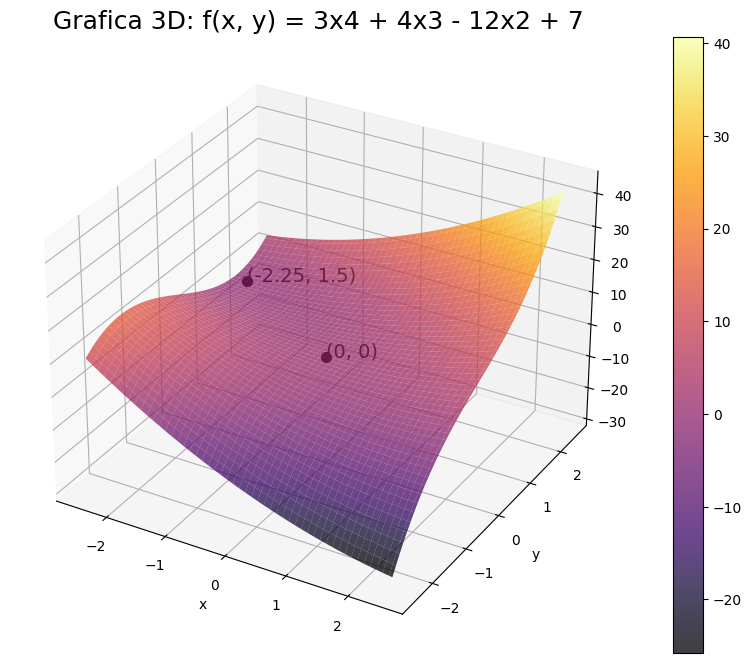

In [11]:
x = np.linspace(-2.5,2.5,100)
y = np.linspace(-2.5,2.5,100)


# FUNCIÓN
X, Y = np.meshgrid(x, y)
fxy = X**2 + Y**3 + 3*X*Y + 1

# PUNTOS CRÍTICO 1 (0,0)
p1x, p1y,  = 0, 0, 
p1fxy = p1x**2 +p1y**3 + 3*p1x*p1y + 1

# PUNTOS CRÍTICO 1 (0,0)
p2x, p2y,  = -9/4, 3/2, 
p2fxy = p2x**2 +p2y**3 + 3*p2x*p2y + 1


fig = plt.figure(figsize= (12,8))

ax = fig.add_subplot(111, projection= '3d')
func = ax.plot_surface(X, Y, fxy,
                       cmap= 'inferno',
                       alpha= 0.75
                       )

ax.scatter(p1x, p1y, p1fxy, color='black', s=50)
ax.text(p1x, p1y, p1fxy, f'({p1x}, {p1y})', color='black', fontsize=14)

ax.scatter(p2x, p2y, p2fxy, color='black', s=50)
ax.text(p2x, p2y, p2fxy, f'({p2x}, {p2y})', color='black', fontsize=14)

fig.colorbar(func)
plt.title('Grafica 3D: f(x, y) = 3x4 + 4x3 - 12x2 + 7', fontdict={'fontsize':18})
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('f(x, y) = 3x4 + 4x3 - 12x2 + 7')


plt.show()

In [12]:
print(f'la función f(x,y) en el punto crítico ({p1x},{p1y}) tiene un valor de {p1fxy}')
print(f'la función f(x,y) en el punto crítico ({p2x},{p2y}) tiene un valor de {p2fxy}')

la función f(x,y) en el punto crítico (0,0) tiene un valor de 1
la función f(x,y) en el punto crítico (-2.25,1.5) tiene un valor de -0.6875


In [13]:
x0 = [0,0]                                         
gamma = 0.01                                                                         
tol = 1e-12
maxit = int(1e5)


f3 = lambda x, y: x**2 + y**3 + 3*x*y + 1            # la funcion a la que voy a aplicar el descenso por gradiente, en este casa multivariable
variables =  ['x', 'y']                              # las variables de la funcion

result = gradient_descent(f3, variables,  x0, gamma, tol, maxit)

print(f'El gradiente = ({list(gradiente(f3, variables).keys())[0]}, {list(gradiente(f3, variables).keys())[1]})')
print("Aproximación de x que cumple ∇F:", result)

El gradiente = (2*x + 3*y, 3*x + 3*y**2)
Aproximación de x que cumple ∇F: [0. 0.]


Por el cálculo análitico demostrado anteriormente se sabe que este **no es un resultado deseado** puesto que no es un minimo de la función, el mínimo de la función es el punto (0,0).

Esto ocurre por que el punto de inicio del método del descenso por gradiente inicia en ese mismo punto y la tasa de aprendizaje no es lo suficientemente elevada como para escapar de este punto.